# A1: Social Media Analytics Project


In [1]:
import tweepy as tw
import config_twitter
# Collect relevant tweets through the Twitter API.
import json
import tweepy as tw

# # Establish Twitter API connection

In [2]:

auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
# returns False if credentials could not be verified, otherwise a user-object
# https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x7fb8b9b53dc0>, _json={'id': 1549094745867173890, 'id_str': '1549094745867173890', 'name': 'Andrea Cifuentes', 'screen_name': 'Acifuentes09', 'location': '', 'description': 'Andrea Cifuentes', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 12, 'listed_count': 0, 'created_at': 'Mon Jul 18 18:12:42 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1549094915136684034/tg_9YWJY_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1549094915136684034/tg_9YWJY_normal.jpg

In [4]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [5]:
api = connect_api_client()

Connected to Twitter API as Andrea Cifuentes


# # Getting the Data

In [6]:
# construct a search query
query = 'movies OR "theme park" OR "series" OR "books" -filter:retweets'

In [7]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 23000

In [8]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets = [tweet._json for tweet in tw.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)

Rate limit reached. Sleeping for: 847
Rate limit reached. Sleeping for: 846
Rate limit reached. Sleeping for: 847
Rate limit reached. Sleeping for: 843
Rate limit reached. Sleeping for: 835
Rate limit reached. Sleeping for: 844
Rate limit reached. Sleeping for: 843
Rate limit reached. Sleeping for: 844


23000

In [9]:
# example tweet content (json structure)
tweets[0]

{'created_at': 'Sat Jul 30 15:20:30 +0000 2022',
 'id': 1553400148147019776,
 'id_str': '1553400148147019776',
 'full_text': 'Vikrant Rona Official Trailer [Kannada] | Kichcha Sudeep | Anup Bhandari... https://t.co/GnA71RZLKJ via @YouTube #VikranthRona #movies #trailerpark #FilmTwitter',
 'truncated': False,
 'display_text_range': [0, 160],
 'entities': {'hashtags': [{'text': 'VikranthRona', 'indices': [113, 126]},
   {'text': 'movies', 'indices': [127, 134]},
   {'text': 'trailerpark', 'indices': [135, 147]},
   {'text': 'FilmTwitter', 'indices': [148, 160]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'YouTube',
    'name': 'YouTube',
    'id': 10228272,
    'id_str': '10228272',
    'indices': [104, 112]}],
  'urls': [{'url': 'https://t.co/GnA71RZLKJ',
    'expanded_url': 'https://youtu.be/-0ldvhBlL-k',
    'display_url': 'youtu.be/-0ldvhBlL-k',
    'indices': [76, 99]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitte

In [10]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [11]:
print (file_out)

raw_tweet_data_23000.json


In [12]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_23000.json'

In [14]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

23000

In [15]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Sat Jul 30 15:20:30 +0000 2022',
 'id': 1553400148147019776,
 'id_str': '1553400148147019776',
 'full_text': 'Vikrant Rona Official Trailer [Kannada] | Kichcha Sudeep | Anup Bhandari... https://t.co/GnA71RZLKJ via @YouTube #VikranthRona #movies #trailerpark #FilmTwitter',
 'truncated': False,
 'display_text_range': [0, 160],
 'entities': {'hashtags': [{'text': 'VikranthRona', 'indices': [113, 126]},
   {'text': 'movies', 'indices': [127, 134]},
   {'text': 'trailerpark', 'indices': [135, 147]},
   {'text': 'FilmTwitter', 'indices': [148, 160]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'YouTube',
    'name': 'YouTube',
    'id': 10228272,
    'id_str': '10228272',
    'indices': [104, 112]}],
  'urls': [{'url': 'https://t.co/GnA71RZLKJ',
    'expanded_url': 'https://youtu.be/-0ldvhBlL-k',
    'display_url': 'youtu.be/-0ldvhBlL-k',
    'indices': [76, 99]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitte

In [16]:
data[0]['full_text']

'Vikrant Rona Official Trailer [Kannada] | Kichcha Sudeep | Anup Bhandari... https://t.co/GnA71RZLKJ via @YouTube #VikranthRona #movies #trailerpark #FilmTwitter'

In [17]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,Vikrant Rona Official Trailer [Kannada] | Kich...
1,We need more. Castillo can only pitch one game...
2,@FrontRowBrad Counterpoint: running on the ova...
3,Highlights of India's ODI squad against Zimbab...
4,Ultraman has already wrapped up filming today ...
...,...
22995,"Chloe Tryon had put pressure on NZ's bowlers, ..."
22996,"@ElaineCamu I'M Terry, “the Warrior” CEO /Cre..."
22997,@ShadeTheWolve @JackPosobiec Lol. Let's just t...
22998,@memmy1516 @KellyKurtz16 @tarashdev I'll leave...


In [18]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,Vikrant Rona Official Trailer [Kannada] | Kich...,0,0,davemac90241
1,We need more. Castillo can only pitch one game...,0,0,DeCarloHall
2,@FrontRowBrad Counterpoint: running on the ova...,0,0,BrockBolton77
3,Highlights of India's ODI squad against Zimbab...,0,0,CricDivyansh
4,Ultraman has already wrapped up filming today ...,0,0,darrennath26
...,...,...,...,...
22995,"Chloe Tryon had put pressure on NZ's bowlers, ...",0,1,_hypocaust
22996,"@ElaineCamu I'M Terry, “the Warrior” CEO /Cre...",0,0,thereecewarrior
22997,@ShadeTheWolve @JackPosobiec Lol. Let's just t...,0,24,dickological
22998,@memmy1516 @KellyKurtz16 @tarashdev I'll leave...,0,0,JimRaginia


In [19]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [20]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,Vikrant Rona Official Trailer [Kannada] | Kich...,0,0,davemac90241,vikrant rona official trailer kannada kichcha ...
1,We need more. Castillo can only pitch one game...,0,0,DeCarloHall,need castillo pitch one game playoffs series
2,@FrontRowBrad Counterpoint: running on the ova...,0,0,BrockBolton77,frontrowbrad counterpoint running oval embarra...
3,Highlights of India's ODI squad against Zimbab...,0,0,CricDivyansh,highlights india odi squad zimbabwe series vir...
4,Ultraman has already wrapped up filming today ...,0,0,darrennath26,ultraman already wrapped filming today ultrama...
...,...,...,...,...,...
22995,"Chloe Tryon had put pressure on NZ's bowlers, ...",0,1,_hypocaust,chloe tryon put pressure nz bowlers mix luus s...
22996,"@ElaineCamu I'M Terry, “the Warrior” CEO /Cre...",0,0,thereecewarrior,elainecamu terry warrior ceo 87 honor women mo...
22997,@ShadeTheWolve @JackPosobiec Lol. Let's just t...,0,24,dickological,shadethewolve jackposobiec lol let throw books...
22998,@memmy1516 @KellyKurtz16 @tarashdev I'll leave...,0,0,JimRaginia,memmy1516 kellykurtz16 tarashdev leave grammar...


In [21]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Vikrant Rona Official Trailer [Kannada] | Kich...,0,0,davemac90241,vikrant rona official trailer kannada kichcha ...,0.000000,0.000000
1,We need more. Castillo can only pitch one game...,0,0,DeCarloHall,need castillo pitch one game playoffs series,-0.400000,0.400000
2,@FrontRowBrad Counterpoint: running on the ova...,0,0,BrockBolton77,frontrowbrad counterpoint running oval embarra...,0.000000,0.000000
3,Highlights of India's ODI squad against Zimbab...,0,0,CricDivyansh,highlights india odi squad zimbabwe series vir...,0.000000,0.000000
4,Ultraman has already wrapped up filming today ...,0,0,darrennath26,ultraman already wrapped filming today ultrama...,0.136364,0.454545
...,...,...,...,...,...,...,...
22995,"Chloe Tryon had put pressure on NZ's bowlers, ...",0,1,_hypocaust,chloe tryon put pressure nz bowlers mix luus s...,0.000000,0.000000
22996,"@ElaineCamu I'M Terry, “the Warrior” CEO /Cre...",0,0,thereecewarrior,elainecamu terry warrior ceo 87 honor women mo...,0.100000,0.450000
22997,@ShadeTheWolve @JackPosobiec Lol. Let's just t...,0,24,dickological,shadethewolve jackposobiec lol let throw books...,0.178571,0.565079
22998,@memmy1516 @KellyKurtz16 @tarashdev I'll leave...,0,0,JimRaginia,memmy1516 kellykurtz16 tarashdev leave grammar...,0.000000,0.000000


In [101]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['harry potter', 'marvel', 'star wars']

In [102]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,harry potter
1,marvel
2,star wars


In [103]:
for brand in brands:
    num_tweet = len(df_tweets[df_tweets['text_clean'].str.contains(brand)])
    print(f"{brand} : {num_tweet} tweets")

harry potter : 41 tweets
marvel : 251 tweets
star wars : 60 tweets


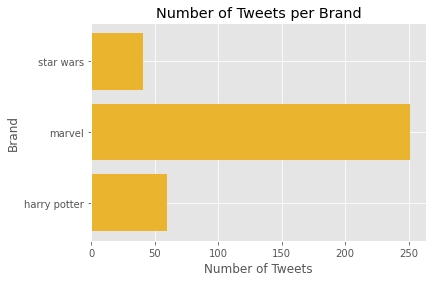

In [91]:

import matplotlib.pyplot as plt
 
## Declaramos valores para el eje y, en este caso son categorias
eje_x = brands
 
## Declaramos valores para el eje x, ahora son los valores
eje_y = [60,251,41]
## Creamos Gráfica y ponesmos las barras de color verde
plt.barh(eje_x, eje_y,color="#EAB42F" )
plt.ylabel('Brand')
plt.xlabel('Number of Tweets')
plt.title('Number of Tweets per Brand')
plt.show()

# # Sentiment Analysis for each Brand 


In [72]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [73]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,harry potter,0.051812
1,marvel,0.107100
2,star wars,0.161698


In [109]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
Harry_Potter = df_tweets[df_tweets['text_clean'].str.contains("harry potter")]
Harry_Potter 

,text,retweets,favorites,user,text_clean,polarity,subjectivity
117,The Harry Potter movies and Percy Jackson book...,0,0,NotKabir1,harry potter movies percy jackson books clear ...,0.100000,0.383333
160,@LShalott No long hair. Somehow it was the “i...,0,0,Dskotch,lshalott long hair somehow image world literal...,0.016667,0.366667
398,I wasn’t allowed to read the Harry Potter book...,0,0,SnarkyTwin,wasnt allowed read harry potter books apparent...,0.050000,0.350000
906,@KittyDraconis @rowlinglibrary @Variety I watc...,0,1,Scamander1616,kittydraconis rowlinglibrary variety watch har...,0.400000,0.800000
3190,@seungminkim @RepBowman I'm rereading the HP b...,0,0,Mimosa48,seungminkim repbowman rereading hp books amazi...,0.368182,0.677273
3216,I know Harry Potter and Fantastic Beasts becau...,0,0,GRlNDELD0RE,know harry potter fantastic beasts family espe...,0.300000,0.833333
3250,Currently drinking green tea and procrastinati...,0,0,yipadeedoodah,currently drinking green tea procrastinating b...,-0.005000,0.450000
3574,So I rewatched all the Harry Potter movies and...,0,1,QualityNinja,rewatched harry potter movies really want see ...,0.100000,0.100000
4010,@ThatEricAlper Harry Potter movies; Heartland,0,0,truthtableJCT,thatericalper harry potter movies heartland,0.000000,0.000000
4419,@IMDb Avengers... Harry Potter and Lord of the...,0,0,SamnaMehreen1,imdb avengers harry potter lord rings seen mov...,0.000000,0.000000


In [111]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
Marvel = df_tweets[df_tweets['text_clean'].str.contains("marvel")]
Marvel 

,text,retweets,favorites,user,text_clean,polarity,subjectivity
56,@Singularity707 Moon knight is Marvel series Tho,0,1,KuroGiri_Lazy,singularity707 moon knight marvel series tho,0.000000,0.000000
89,The manhua has been feeding us so well\n \n#bo...,0,0,_deadho,manhua feeding us well books gamedev japanmarvel,0.000000,0.000000
219,@AAyers16 It better be after all this disappoi...,0,0,Erikavond2,aayers16 better disappointments new marvel movies,0.318182,0.477273
244,taiz reminded me of marvel and now i wanna wat...,0,0,ppluvr420_,taiz reminded marvel wan na watch movies damnit,-0.200000,0.150000
332,I can’t wait for the dudebros to bet they’re n...,0,0,visionofstyles,cant wait dudebros bet theyre gon na watch new...,0.136364,0.454545
...,...,...,...,...,...,...,...
22173,@AliAbdelaziz00 @USMAN84kg That movie will be ...,0,1,Magnumwarthog76,aliabdelaziz00 usman84kg movie trash like last...,0.000000,0.066667
22205,@StarMoviesIndia @StarMoviesIndia please give ...,0,0,badboii_007,starmoviesindia starmoviesindia please give ta...,0.000000,0.000000
22604,@illblerdmatic As soon as that music scene hap...,0,1,JonesWinslow,illblerdmatic soon music scene happened blown ...,0.466667,0.916667
22713,@mainmarvel Movies,0,0,JemuelIdanan,mainmarvel movies,0.000000,0.000000


In [110]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
Star_Wars=df_tweets[df_tweets['text_clean'].str.contains("star wars")]
Star_Wars 

,text,retweets,favorites,user,text_clean,polarity,subjectivity
97,"@Serenity3000 Nope, haven't seen that show. No...",0,0,LibertarianSol,serenity3000 nope seen show disrespect ewoks w...,0.136364,0.454545
278,"@CesarGo47624873 @SskeerMadness No, it's becau...",0,0,Will_F_O_M,cesargo47624873 sskeermadness star wars consta...,0.068182,0.277273
284,@SewwattSknew @PeterGilmoreArt @Dremifir @Anne...,0,0,owensje,sewwattsknew petergilmoreart dremifir annecomi...,0.317857,0.542857
307,STAR WARS The Black Series Archive - Imperial ...,0,0,PreciosCompara,star wars black series archive imperial death ...,-0.166667,0.433333
478,@hjeutysd @robinhanson If you want to go deep ...,0,0,e_considine,hjeutysd robinhanson want go deep ca hype enou...,0.234091,0.526136
567,I listen to A LOT of audiobooks! 🎧 Some of my ...,0,0,DaveTheOmbuds,listen lot audiobooks recent favorites timothy...,0.260000,0.720000
729,@AlishaGrauso @ashleybrantley1 @therealsupes I...,0,0,cliffykus1,alishagrauso ashleybrantley1 therealsupes alte...,0.320000,0.300000
1137,With Obi-Wan Kenobi wrapped and a A New Hope r...,0,0,testbot111222,kenobi wrapped new hope right waiting watch st...,0.140693,0.330087
1952,@JacquieOtt7 @ofctimallen Do you honestly thin...,0,0,later_gater_79,jacquieott7 ofctimallen honestly think anyone ...,0.018182,0.702273
2009,#ThisDayInFandomHistory: Nelvana Inc. is a Can...,0,1,vault0overseer,thisdayinfandomhistory nelvana canadian animat...,0.357143,0.571429


In [123]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
Harry_Potter.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
7700,"On the Blog Jul 30, 2018: Harry Potter and the...",0,0,OddnessMoving,blog jul 30 2018 harry potter chamber secrets ...,0.500000,1.000000
906,@KittyDraconis @rowlinglibrary @Variety I watc...,0,1,Scamander1616,kittydraconis rowlinglibrary variety watch har...,0.400000,0.800000
17130,@nosafk Lol. Harry Potter paperback novels. Th...,0,1,simplydehrah,nosafk lol harry potter paperback novels entir...,0.400000,0.662500
3190,@seungminkim @RepBowman I'm rereading the HP b...,0,0,Mimosa48,seungminkim repbowman rereading hp books amazi...,0.368182,0.677273
14202,@fairybearr my friend recommended “it ends wit...,0,1,soonievanilla,fairybearr friend recommended ends us got also...,0.350000,0.866667
18361,Every cast in the Harry Potter movies were the...,0,8,YucaTOEIC1,every cast harry potter movies strangers assem...,0.344444,0.450000
10164,@robertjwolfmd My mom almost stopped me readin...,0,0,DavidPe10215661,robertjwolfmd mom almost stopped reading harry...,0.325000,0.416667
3216,I know Harry Potter and Fantastic Beasts becau...,0,0,GRlNDELD0RE,know harry potter fantastic beasts family espe...,0.300000,0.833333
10158,@MarsalaBuatLo 1. Toy Story series\n2. Ghibli ...,0,0,jisoosh1t,marsalabuatlo toy story series ghibli movies u...,0.300000,0.422222
19198,E&amp;M author Laura Worsch grew up with #Harr...,0,0,europeandme,e author laura worsch grew harrypotter fantast...,0.275000,0.550000


In [124]:
Marvel.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
10491,"Critics say Gorr is ""one of the best villains ...",0,0,ICON_Chicago,critics say gorr one best villains mcu witness...,1.000000,0.300000
13165,@LeonardoSeresin @Faustuszero @Bob_Layton @all...,0,2,DaveTho55529017,leonardoseresin faustuszero allthingshulk marv...,0.900000,0.525000
10549,@arg11 @gazpachomachine @Viggie_Smalls93 Acade...,0,1,isthistinder,arg11 gazpachomachine academy awards good indi...,0.850000,0.450000
6692,"What an great meanings, this is really amazing...",0,0,Tanu1848,great meanings really amazing series really ma...,0.800000,0.883333
1232,@DalgarnoBarry @MarvelMultive There are alread...,0,0,BKBorn_n_Raised,dalgarnobarry marvelmultive already rumors pla...,0.800000,0.900000
18993,@theislandgyal I'm watching g marvel movies to...,0,0,islandflowahips,theislandgyal watching g marvel movies work da...,0.800000,0.700000
17576,Are You ready To watch this awesome series #Pa...,0,0,_itskaransingh_,ready watch awesome series paperrocketonzee5 z...,0.733333,0.833333
8792,I don’t think it’s a good idea to have two Ave...,0,0,TrillerJ_,dont think good idea two avengers movies come ...,0.700000,0.600000
13474,I hope that Daredevil getting a revival means ...,0,0,DoctorWhoHugh,hope daredevil getting revival means agent car...,0.700000,0.600000
8925,@Turtz911 @CmonSpiderSense @_ChristopherM We g...,0,1,TTHOOM,turtz911 cmonspidersense get training montages...,0.700000,0.600000


In [125]:
Star_Wars.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
3528,@roguecaliber Rifts. \nWEG Star Wars\nPathfind...,0,0,OtherverseG,roguecaliber rifts weg star wars pathfinder 1e...,1.000000,1.000000
8680,@MJRAdventures 😍😍A fellow Star Wars fan😍!! I’m...,0,0,byMorganWright,mjradventures fellow star wars fan im hoping t...,0.700000,0.600000
7780,@walt_latham What can I say? if Star Wars was...,0,0,XennialV82,say star wars selling good books tearing chart...,0.700000,0.600000
2119,• Star Wars: The Clone Wars\n\n• Star Wars: Re...,1,28,MaceAhWindu,star wars clone wars star wars rebels mandalor...,0.516667,0.862963
12522,Why Is Marvel Doing Better Than Star Wars on D...,0,0,starwars247info,marvel better star wars cbr launched star wars...,0.500000,0.500000
16216,I would love a Star Wars “What If” series.,1,1,Pinkk_glitter,would love star wars series,0.500000,0.600000
21715,Pretty stoked as my kids just came up to me an...,1,5,willweinraub,pretty stoked kids came asked watch every star...,0.462121,0.584848
11376,@BrianKFeltman @ProfBillAllison @arl0008 @Spit...,0,1,modscholarpod,briankfeltman profbillallison arl0008 spitfire...,0.390000,0.480000
11732,Film buffs and Star Wars fans alike have somet...,0,0,DisDining_com,film buffs star wars fans alike something exci...,0.368750,0.662500
2009,#ThisDayInFandomHistory: Nelvana Inc. is a Can...,0,1,vault0overseer,thisdayinfandomhistory nelvana canadian animat...,0.357143,0.571429


In [117]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)['user']

18787        thetaeprint
21074       philconcerts
11960       kylegriffin1
8926        heeseungcokr
9229           Iovenanon
21459          TST_Offcl
19447       BLUPDATE2022
18419         Inferius29
17898              Ei3Ni
14221    CourtneyRCronin
Name: user, dtype: object

In [115]:
# users with the most retweeted content for harry potter 
Harry_Potter.sort_values(by='retweets', ascending=False).head(10)['user'] 

11569          OasisApp
12944      HKCRadioLive
7415           lmhysoht
14746     BalthierJudge
12329          rjegvlus
12724        ayakaguuji
12867           liash1t
13241    CyrilMiroshnik
13628      Ph1IWasHere_
14202     soonievanilla
Name: user, dtype: object

In [116]:

    Harry_Potter.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
11569,We asked our ambassadors to share how they wou...,3,4,OasisApp,asked ambassadors share would start conversati...,-0.050000,0.225000
12944,Stay tuned after the Jess Mess for Tales of Be...,1,0,HKCRadioLive,stay tuned jess mess tales beatle bard stick a...,0.037500,0.254167
7415,Is there a movie you could watch over and over...,1,1,lmhysoht,movie could watch never get tired easy jurassi...,0.016667,0.766667
14746,Is there a movie you could watch over and over...,0,0,BalthierJudge,movie could watch never get tired hmmm lot mov...,-0.275000,0.550000
12329,if i watch harry potter movies i start from po...,0,28,rjegvlus,watch harry potter movies start poa yeah know ...,-0.166667,0.433333
12724,"7. harry potter series, the perks of being a w...",0,1,ayakaguuji,harry potter series perks wallflower,0.000000,0.000000
12867,@MarsalaBuatLo 1. Harry Potter all series\n2. ...,0,0,liash1t,marsalabuatlo harry potter series spirited awa...,-0.100000,0.700000
13241,Three weeks ago I started reading Harry Potter...,0,2,CyrilMiroshnik,three weeks ago started reading harry potter b...,0.100000,0.100000
13628,For some reason I wanna watch all the Harry Po...,0,0,Ph1IWasHere_,reason wan na watch harry potter movies today,-0.200000,0.150000
14202,@fairybearr my friend recommended “it ends wit...,0,1,soonievanilla,fairybearr friend recommended ends us got also...,0.350000,0.866667


In [119]:
Marvel.sort_values(by='retweets', ascending=False).head(10)['user'] 

21712     SiPalingMarvel
4330     ComicGirlAshley
11735           GameSpot
15131        ToppsMARVEL
9657      barstoolsports
18902    whatJuicyJaySay
7783        KarenMurray_
19594      picassosenemy
12886        HollyRuston
12677            raveryn
Name: user, dtype: object

In [120]:
Marvel.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
21712,she is a 10 but ga nonton series marvel,7,29,SiPalingMarvel,10 ga nonton series marvel,0.000000,0.000000
4330,Really wish Marvel had a big catalog of animat...,6,80,ComicGirlAshley,really wish marvel big catalog animated movies...,0.190000,0.440000
11735,"There have been 68 Marvel movies, but do you k...",4,57,GameSpot,68 marvel movies know one made box office see ...,0.350000,0.550000
15131,Editor's Choice 2022 Series 3 continues! Each ...,3,7,ToppsMARVEL,editor choice 2022 series 3 continues week lea...,0.136364,0.454545
9657,EVERYTHING You Need To Know About The Upcoming...,3,89,barstoolsports,everything need know upcoming marvel movies tv...,0.250000,0.500000
18902,Man no marvel movie pulled my heart strings li...,1,5,whatJuicyJaySay,man marvel movie pulled heart strings like spi...,0.250000,0.825000
7783,Does Iida and Ami both wearing green make this...,1,2,KarenMurray_,iida ami wearing green make battle give marvel...,-0.200000,0.300000
19594,@JeanGen09181213 Marvel shills likes to act li...,1,6,picassosenemy,jeangen09181213 marvel shills likes act like m...,0.152987,0.263766
12886,Saw all the Marvel movies this year and this i...,1,13,HollyRuston,saw marvel movies year one maybe 2 scenes peop...,0.000000,0.000000
12677,@wbd The only reason the Restore the Snyderver...,1,3,raveryn,wbd reason restore snyderverse movement exists...,0.350000,0.600000


In [121]:
Star_Wars.sort_values(by='retweets', ascending=False).head(10)['user'] 

3351                 IGN
11959     RottenTomatoes
11336           emme_ttv
2119         MaceAhWindu
18956      PoulpeJouasse
21715       willweinraub
16216      Pinkk_glitter
11202    julianorobertrj
11376      modscholarpod
11732      DisDining_com
Name: user, dtype: object

In [122]:
Star_Wars.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
3351,With Obi-Wan Kenobi wrapped and a A New Hope r...,28,161,IGN,kenobi wrapped new hope right waiting watch st...,0.140693,0.330087
11959,"The 70s movies you need to see, form Star Wars...",8,59,RottenTomatoes,70s movies need see form star wars godfather t...,0.000000,0.000000
11336,Since I’ve been watching the Kenobi and Clone ...,2,16,emme_ttv,since ive watching kenobi clone wars series mi...,0.000000,0.100000
2119,• Star Wars: The Clone Wars\n\n• Star Wars: Re...,1,28,MaceAhWindu,star wars clone wars star wars rebels mandalor...,0.516667,0.862963
18956,@wanderingears @AizennxXx @Spookie_Pie I love ...,1,1,PoulpeJouasse,wanderingears aizennxxx love channel helped fi...,-0.046825,0.662698
21715,Pretty stoked as my kids just came up to me an...,1,5,willweinraub,pretty stoked kids came asked watch every star...,0.462121,0.584848
16216,I would love a Star Wars “What If” series.,1,1,Pinkk_glitter,would love star wars series,0.500000,0.600000
11202,@hutton_clare @ransomcenter @IrelandCGAustin J...,0,1,julianorobertrj,ransomcenter irelandcgaustin joseph campbell f...,0.050000,0.211111
11376,@BrianKFeltman @ProfBillAllison @arl0008 @Spit...,0,1,modscholarpod,briankfeltman profbillallison arl0008 spitfire...,0.390000,0.480000
11732,Film buffs and Star Wars fans alike have somet...,0,0,DisDining_com,film buffs star wars fans alike something exci...,0.368750,0.662500


# # Keyword Analysis


In [37]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

In [38]:
import numpy as np
from PIL import Image
fpath = "/Library/Fonts/Arial Unicode.ttf"
from wordcloud import WordCloud, ImageColorGenerator

def get_wordcrowd_color_mask( text, imgpath ):
    img_color = np.array(Image.open( imgpath ))
    wc = WordCloud(width=800,
                   height=600,
                   font_path=fpath,
                   mask=img_color,
                   collocations=False, # 単語の重複しないように
                   mode="RGBA",
                   background_color=None
                  ).generate( text )

    image_colors = ImageColorGenerator(img_color)
    #from IPython.core.debugger import Pdb; Pdb().set_trace()
    # show
    plt.figure(figsize=(6,6), dpi=200)
    plt.imshow(wc.recolor(color_func=image_colors), # 元画像の色を使う
               interpolation="bilinear")
    plt.axis("off")
    plt.show()

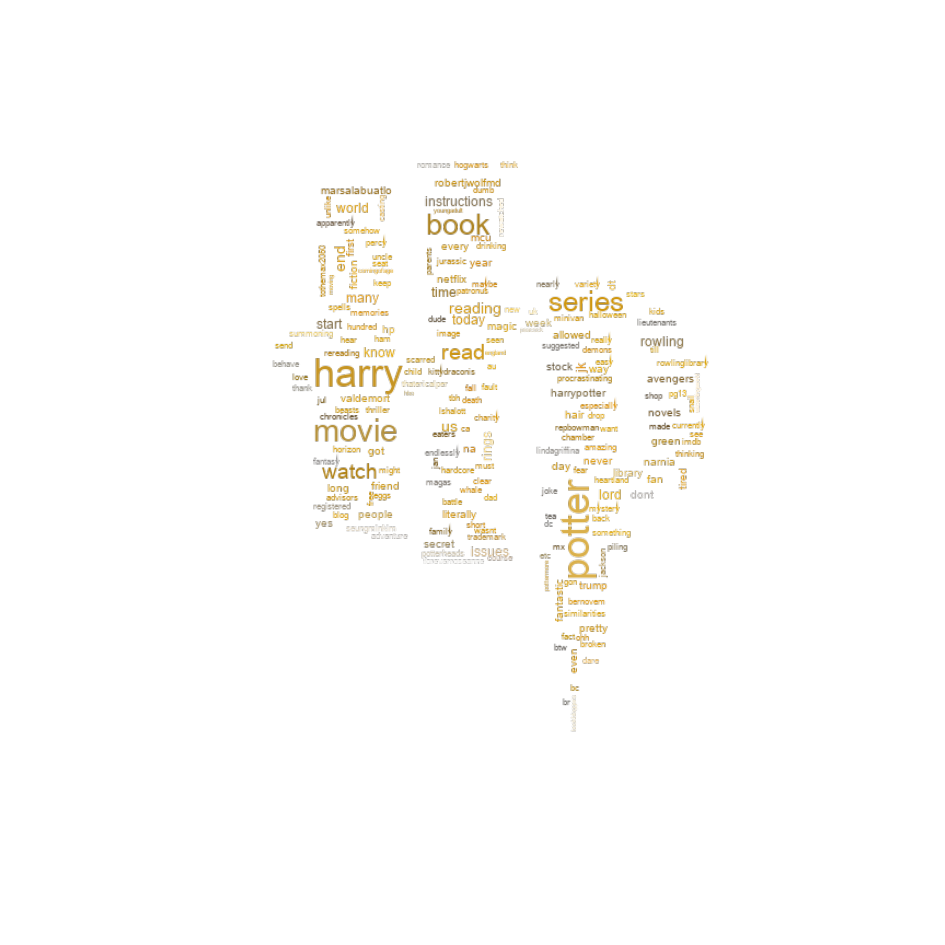

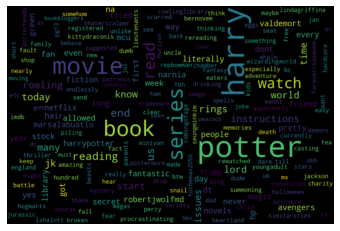

In [46]:
b = 'harry potter'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
get_wordcrowd_color_mask(brand_all_text(b), './HP-Logo.jpg')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

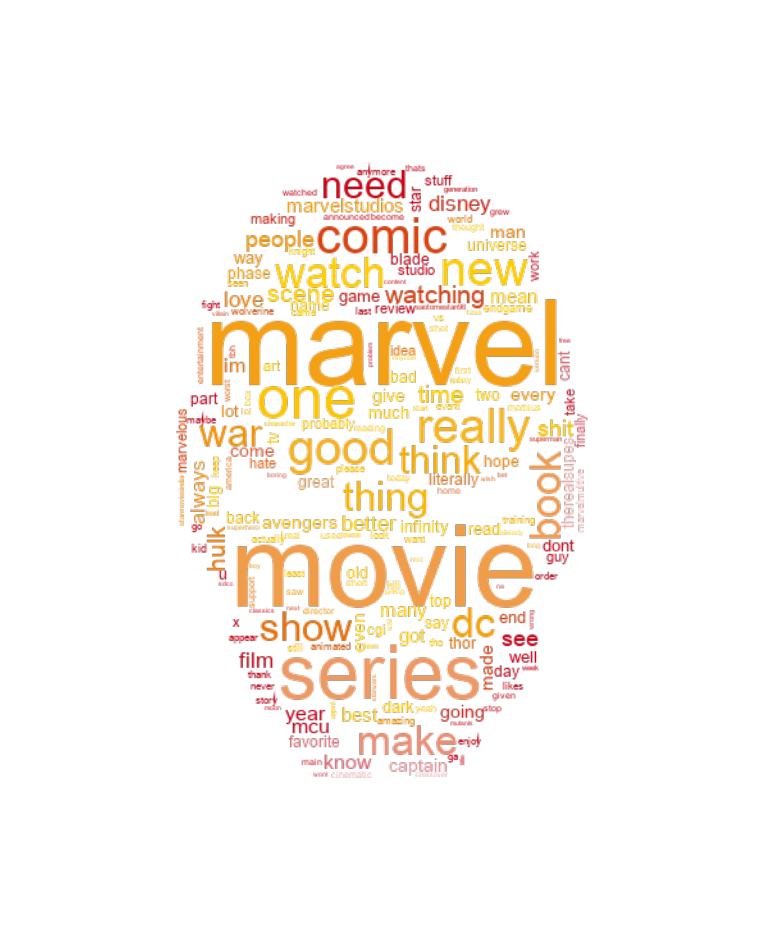

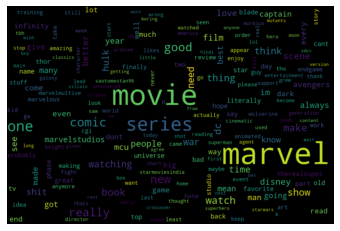

In [94]:
b = 'marvel'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
get_wordcrowd_color_mask(brand_all_text(b), './Ironman2.jpeg')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

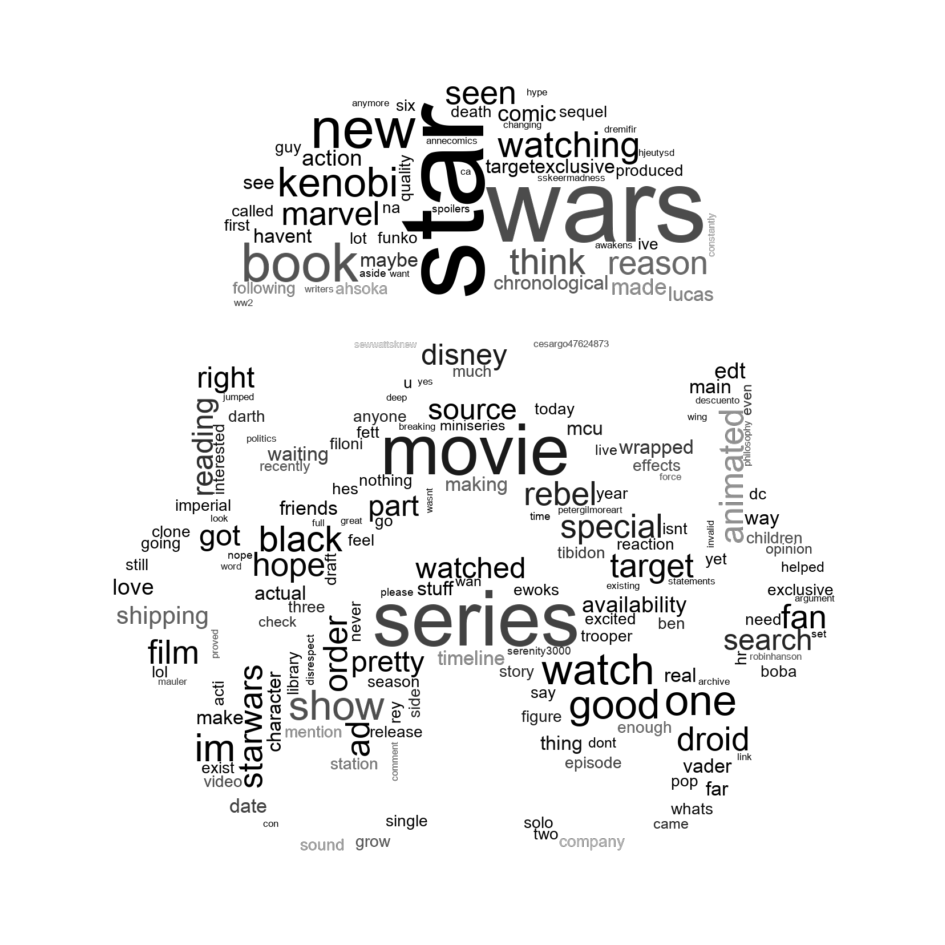

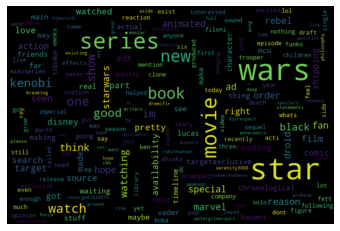

In [57]:
b = 'star wars'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
get_wordcrowd_color_mask(brand_all_text(b), './SW.jpg')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

harry potter


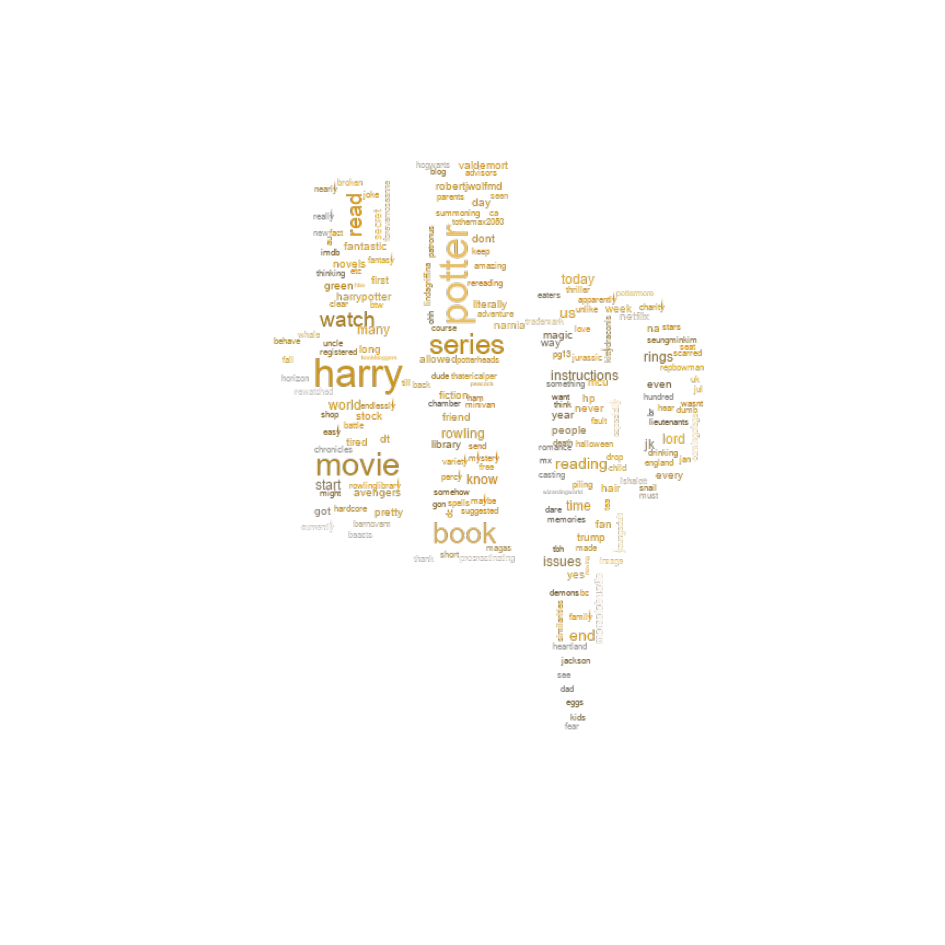

<bound method DataFrame.items of                count
keyword             
harry potter      41
book              20
series            18
potter movies     13
movie             11
...              ...
thriller           1
adventure          1
mystery            1
stars              1
tiktok             1

[416 rows x 1 columns]>

marvel


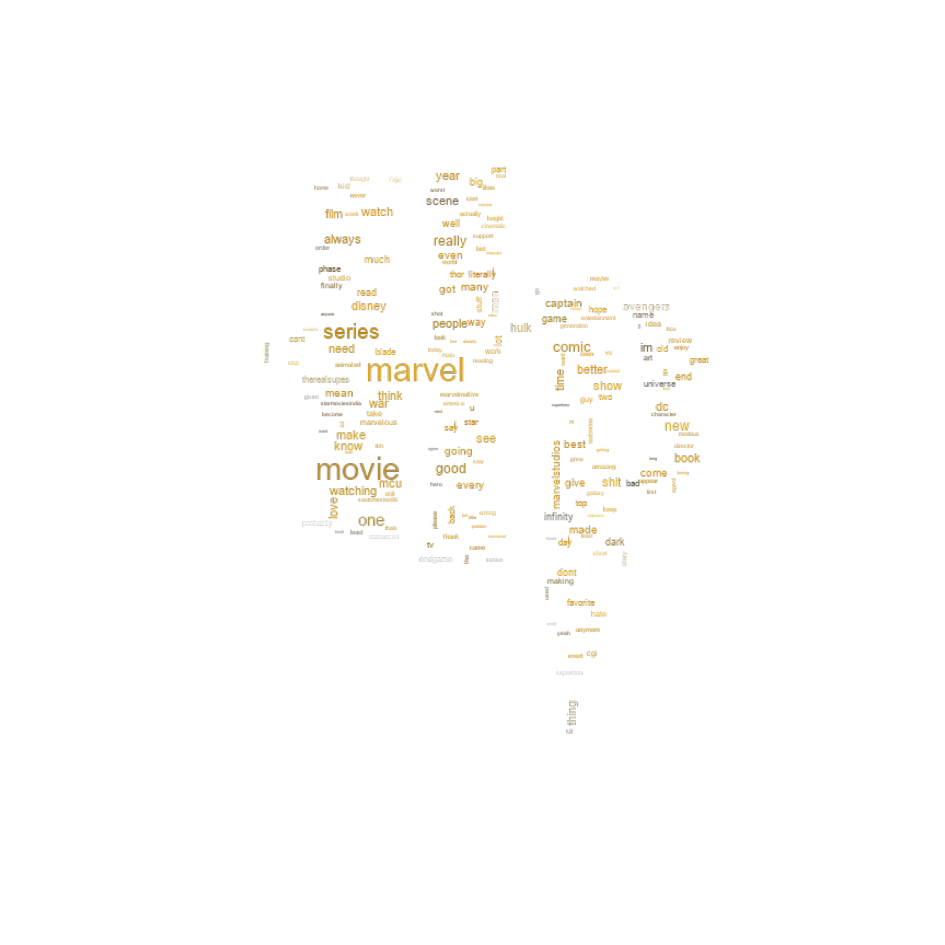

<bound method DataFrame.items of                 count
keyword              
marvel            135
movie             124
marvel movie       97
series             70
one                38
...               ...
drawn               1
westanearth         1
sb19                1
stanworld           1
singularity707      1

[1712 rows x 1 columns]>

star wars


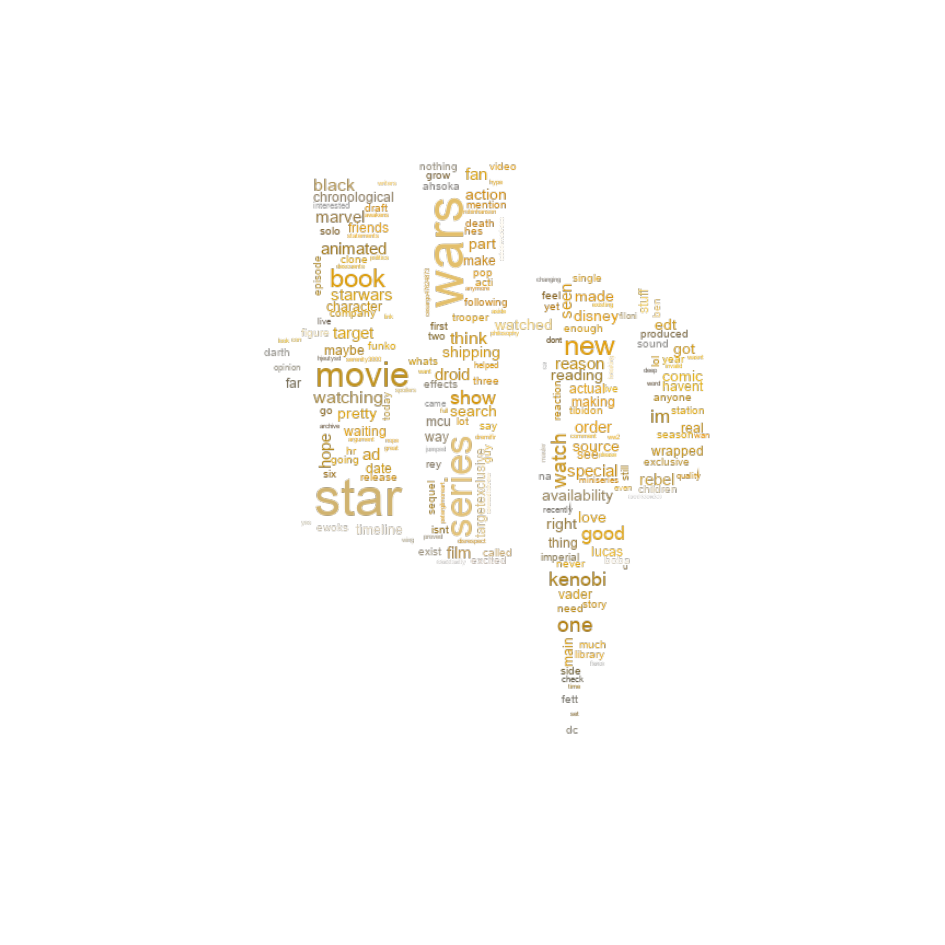

<bound method DataFrame.items of               count
keyword            
star wars        65
movie            27
series           26
new              17
book             15
...             ...
surprisingly      1
table             1
coffee            1
breaking          1
serenity3000      1

[610 rows x 1 columns]>



In [49]:
for b in brands:
    if len(brand_all_text(b)) != 0:
        
        #create a wordcloud
        print(b)
        #wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
        #plt.axis("off")
        #plt.imshow(wc, interpolation="bilinear")
        #plt.show()
        
        get_wordcrowd_color_mask(brand_all_text(b), './HP-Logo.jpg')
        
        #count words in the wordcloud
        text_combined = brand_all_text(b)
        kwords = WordCloud().process_text(text_combined)
        df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
        df_kwords = df_kwords.sort_values(by="count", ascending=False)
        print(df_kwords.items)
        print("=========================================\n")
        
    else:
        print(f"{b} has no tweets.")
        print("=========================================\n")

In [62]:
import nltk

In [63]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_documents([d.split() for d in df_tweets['text_clean']])

bigram_finder.apply_freq_filter(3)

bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('vikrant', 'rona'), 4),
 (('official', 'trailer'), 7),
 (('via', 'youtube'), 49),
 (('one', 'game'), 8),
 (('embarrassing', 'series'), 3),
 (('highlights', 'india'), 4),
 (('india', 'odi'), 6),
 (('odi', 'squad'), 8),
 (('squad', 'zimbabwe'), 15),
 (('zimbabwe', 'series'), 42),
 (('series', 'virat'), 7),
 (('virat', 'kohli'), 34),
 (('kohli', 'play'), 12),
 (('play', 'series'), 23),
 (('series', 'shikhar'), 6),
 (('shikhar', 'dhawan'), 14),
 (('dhawan', 'lead'), 12),
 (('lead', 'kl'), 4),
 (('kl', 'rahul'), 13),
 (('rahul', 'play'), 5),
 (('play', 'rohit'), 4),
 (('rohit', 'pant'), 4),
 (('pant', 'bhuvi'), 4),
 (('bhuvi', 'shami'), 4),
 (('shami', 'bumrah'), 4),
 (('bumrah', 'rested'), 5),
 (('rested', 'maiden'), 4),
 (('maiden', 'odi'), 8),
 (('odi', 'call'), 8),
 (('call', 'rahul'), 5),
 (('rahul', 'tripathi'), 10),
 (('tripathi', 'deepak'), 4),
 (('deepak', 'chahar'), 19),
 (('chahar', 'sundar'), 4),
 (('sundar', 'returns'), 3),
 (('movie', 'new'), 8),
 (('new', 'generation'), 5)

In [64]:
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
paperrocketonzee5 zee5tamil,577
world series,411
read books,308
web series,217
horror movies,204
...,...
books haha,3
booknerd bookaddict,3
group qualifying,3


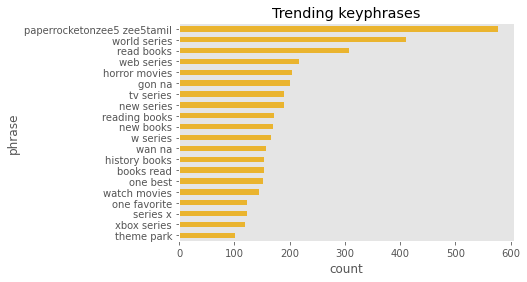

In [126]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh', grid=False, color = "#EAB42F" )
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()

In [129]:
echo "# A1_Social-Media-Analytics-Project" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Andi-ai/A1_Social-Media-Analytics-Project.git
git push -u origin main


SyntaxError: invalid syntax (991231598.py, line 1)